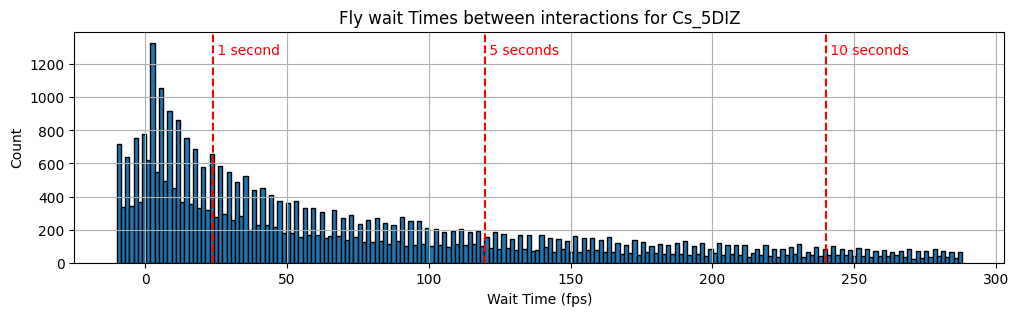

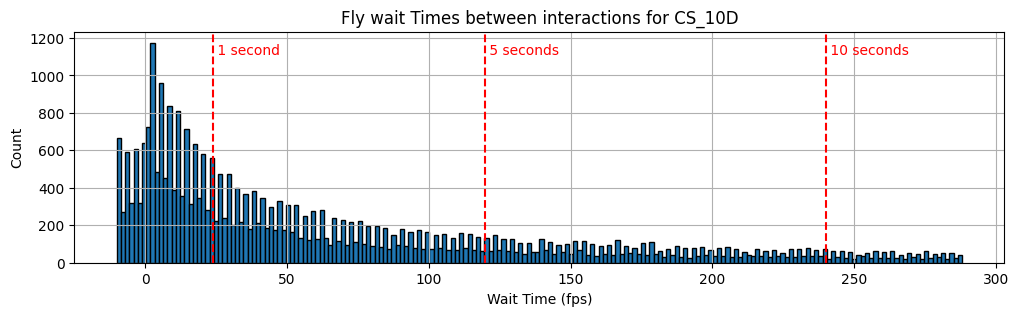

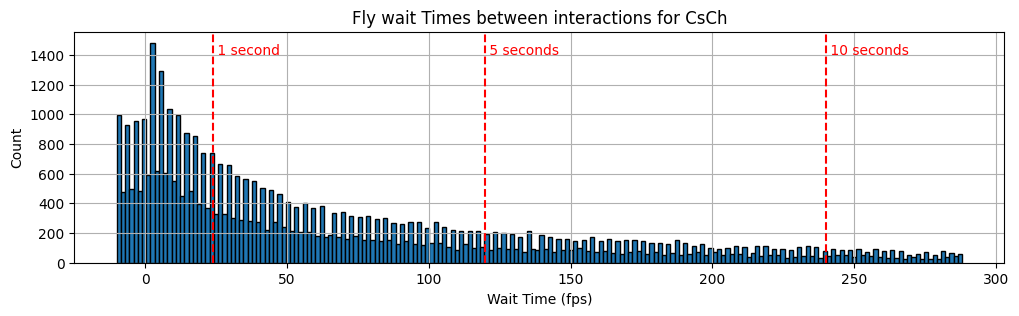

In [2]:
import os
import sys
import toml

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from src import settings
from src.utils import fileio

config = fileio.get_config(settings.CONFIG_NAME)
TREATMENTS = config["TREATMENTS"]

for TREATMENT in TREATMENTS:
    INPUT_DIR = os.path.join(settings.OUTPUT_DIR, "1_0_find_interactions", TREATMENT)
    # SCRIPT_OUTPUT = os.path.join(settings.OUTPUT_DIR, "PATH/TO/SAVE/FILE", TREATMENT)
    # os.makedirs(SCRIPT_OUTPUT, exist_ok=True)

    treatment = fileio.load_files_from_folder(INPUT_DIR)
    all_times = []
    for group_name, group_path in treatment.items():
        df = pd.read_csv(group_path, index_col=0)
        df = df.sort_values("start_of_interaction")
        df.drop(columns=["distance", "angle"], inplace=True)
        df = df.reset_index(drop=True)

        for c in list(df.node_1.unique()):
            filtered_flies = df[(df["node_1"] == c)]
            start_array = filtered_flies["start_of_interaction"].to_numpy()
            end_array = filtered_flies["end_of_interaction"].to_numpy()

            array_start = start_array[1:]
            array_end = end_array[:-1]
            wait_time = array_start - array_end
            all_times.extend(wait_time)

    all_times = np.array(all_times)
    all_times = all_times[all_times <= 12 * 24]
    all_times = all_times[all_times >= -10]
    plt.figure(figsize=(12, 3))
    plt.hist(all_times, bins=200, edgecolor="black")
    plt.title(f"Fly wait Times between interactions for {TREATMENT}")
    plt.xlabel("Wait Time (fps)")
    # plt.xlim(0,)
    plt.ylabel("Count")
    plt.grid(True)

    line_values = [24, 5 * 24, 10 * 24]
    labels = [" 1 second", " 5 seconds", " 10 seconds"]
    for value, label in zip(line_values, labels):
        plt.axvline(x=value, color="red", linestyle="--")
        plt.text(value, plt.ylim()[1] * 0.9, label, color="red", ha="left")

    plt.show()

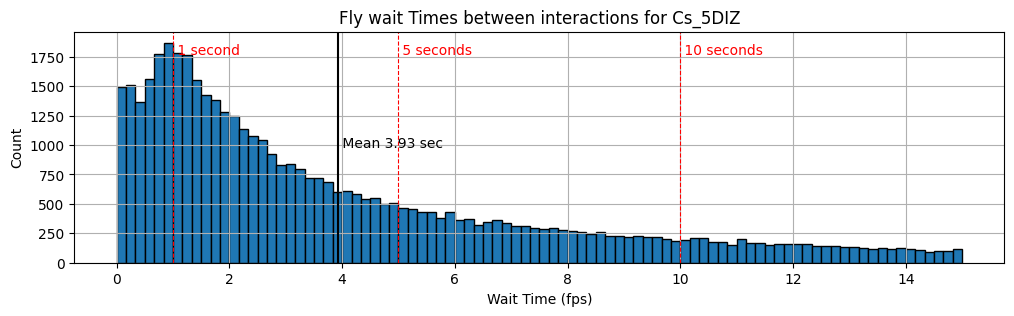

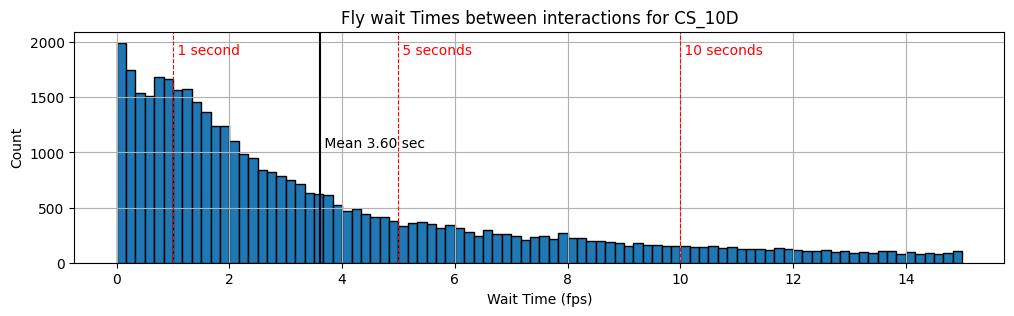

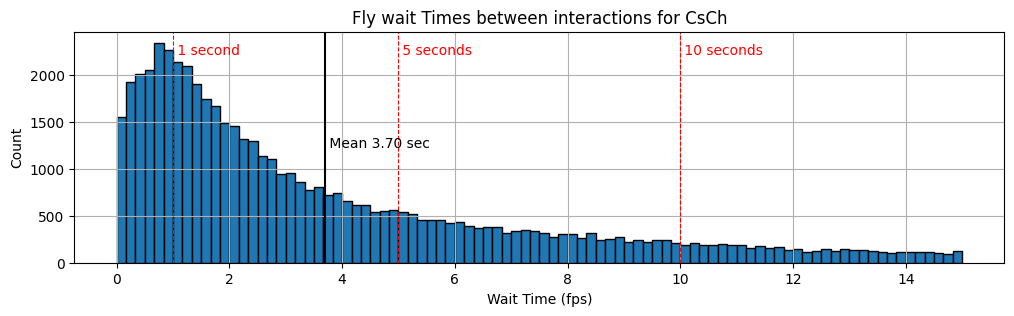

In [10]:
import os
import sys
import toml

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from src import settings
from src.utils import fileio

config = fileio.get_config(settings.CONFIG_NAME)
TREATMENTS = config["TREATMENTS"]

for TREATMENT in TREATMENTS:
    INPUT_DIR = os.path.join(settings.OUTPUT_DIR, "1_0_find_interactions", TREATMENT)
    # SCRIPT_OUTPUT = os.path.join(settings.OUTPUT_DIR, "PATH/TO/SAVE/FILE", TREATMENT)
    # os.makedirs(SCRIPT_OUTPUT, exist_ok=True)

    treatment = fileio.load_files_from_folder(INPUT_DIR)
    all_times = []
    for group_name, group_path in treatment.items():
        df = pd.read_csv(group_path, index_col=0)
        df = df.sort_values("start_of_interaction")
        df.drop(columns=["distance", "angle"], inplace=True)
        df = df.reset_index(drop=True)

        for c in list(df.node_1.unique()):
            filtered_flies = df[(df["node_1"] == c)]
            start_array = filtered_flies["start_of_interaction"].to_numpy()
            end_array = filtered_flies["start_of_interaction"].to_numpy()

            array_start = start_array[1:]
            array_end = end_array[:-1]
            wait_time = array_start - array_end
            all_times.extend(wait_time)

    all_times = np.array(all_times)
    all_times = all_times / config["FPS"]
    all_times = all_times[all_times <= 15]
    # all_times = all_times[all_times >= -10]
    plt.figure(figsize=(12, 3))
    plt.hist(all_times, bins=90, edgecolor="black")
    plt.title(f"Fly wait Times between interactions for {TREATMENT}")
    plt.xlabel("Wait Time (fps)")
    # plt.xlim(0,)
    plt.ylabel("Count")
    plt.grid(True)

    plt.axvline(x=np.mean(all_times), color="black", linestyle="-")
    mean_value = np.mean(all_times)
    plt.text(np.mean(all_times), plt.ylim()[1] * 0.5, f" Mean {mean_value:.2f} sec", color="black", ha="left")

    line_values = [1, 5, 10]
    labels = [" 1 second", " 5 seconds", " 10 seconds"]
    for value, label in zip(line_values, labels):
        plt.axvline(x=value, color="red", linestyle="--", linewidth=0.8)
        plt.text(value, plt.ylim()[1] * 0.9, label, color="red", ha="left")

    plt.show()